In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [492]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/LT.csv")

In [493]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-06-23,LT,EQ,2.00,500.0,745.0,150.0,638.00,635.95,627.71,2699293,1.694372e+14,NaN,395612,0.1466
1,2004-06-24,LT,EQ,635.95,630.0,630.0,608.4,612.00,616.00,618.21,913575,5.647802e+13,NaN,305751,0.3347
2,2004-06-25,LT,EQ,616.00,619.0,679.0,616.1,665.00,668.30,658.45,1637383,1.078136e+14,NaN,217950,0.1331
3,2004-06-28,LT,EQ,668.30,660.0,671.9,640.2,653.00,656.40,657.39,913349,6.004271e+13,NaN,194984,0.2135
4,2004-06-29,LT,EQ,656.40,656.0,683.4,653.0,666.85,671.70,675.11,743063,5.016488e+13,NaN,101786,0.1370


In [494]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4184 non-null   object 
 1   Symbol              4184 non-null   object 
 2   Series              4184 non-null   object 
 3   Prev Close          4184 non-null   float64
 4   Open                4184 non-null   float64
 5   High                4184 non-null   float64
 6   Low                 4184 non-null   float64
 7   Last                4184 non-null   float64
 8   Close               4184 non-null   float64
 9   VWAP                4184 non-null   float64
 10  Volume              4184 non-null   int64  
 11  Turnover            4184 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4184 non-null   int64  
 14  %Deliverble         4184 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 490.4

In [495]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4.184000e+03,4.184000e+03,2456.000000,4.184000e+03,4184.000000
mean,1533.954457,1536.559285,1559.038325,1511.295495,1534.166551,1534.274355,1535.421214,1.917127e+06,2.644572e+14,85699.350977,8.946498e+05,0.474611
std,588.074537,589.993760,602.260762,574.961274,587.548900,587.604848,588.289079,1.708891e+06,2.036930e+14,48006.882654,8.280753e+05,0.116405
min,2.000000,500.000000,583.400000,150.000000,564.350000,562.050000,569.760000,3.022900e+04,3.660836e+12,2308.000000,1.047900e+04,0.071900
25%,1237.212500,1236.487500,1255.962500,1220.037500,1237.875000,1237.487500,1239.057500,8.794398e+05,1.461543e+14,54086.500000,3.703270e+05,0.396775
50%,1433.100000,1435.025000,1455.000000,1413.350000,1434.225000,1433.100000,1434.820000,1.518669e+06,2.263673e+14,74145.500000,6.905090e+05,0.481050
75%,1666.712500,1668.350000,1685.850000,1646.025000,1667.000000,1666.712500,1665.792500,2.431827e+06,3.339506e+14,101838.250000,1.168027e+06,0.558100
max,4506.700000,4510.000000,4690.000000,4430.000000,4512.000000,4506.700000,4509.600000,2.115335e+07,2.706056e+15,420826.000000,1.556991e+07,0.990100


In [496]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [497]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [498]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [499]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [500]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [501]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [502]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4179,1.375661,0.439833,1335.90,1431562,NaN
4180,3.933678,3.110530,1380.65,4303909,NaN
4181,2.000000,-0.646279,1375.90,3220346,NaN
4182,2.663465,-1.828101,1358.65,2221346,NaN
4183,2.163012,-0.707407,1340.45,1968093,NaN


In [503]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [504]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [505]:
#Define the prediction model
model = RandomForestRegressor()

In [506]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [507]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.7788417373709638


In [508]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [509]:
predictions = model.predict(X_Check)

In [510]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

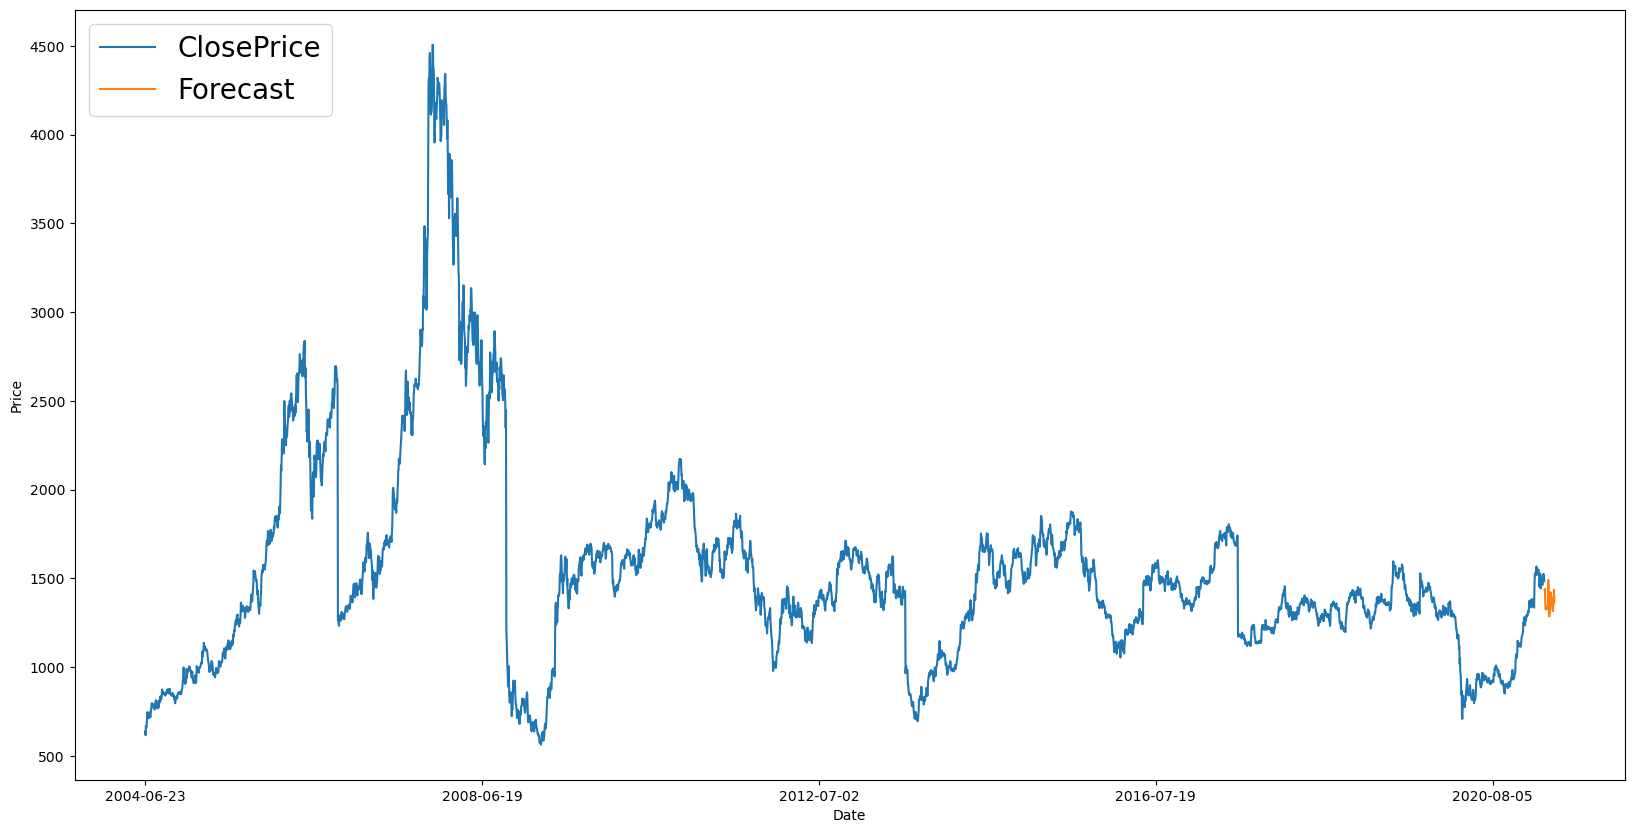

In [511]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')